# Import packages

In [6]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize

In [7]:
import scanpy as sc
import pandas as pd

In [21]:
import matplotlib as mpl

## Read object

In [4]:
adata = sc.read("/home/lugli/spuccio/Projects/SP025_NaClTcell/singlecell/Analysis/CD8.h5ad")

In [49]:
adata.obs['predicted_doublets'].unique()

array([False])

In [10]:
auc_mtx = pd.read_csv("CD8auc.csv",index_col=0)

In [59]:
?regulon_specificity_scores

In [14]:
rss_cellType = regulon_specificity_scores( auc_mtx, adata.obs['Treatment'] )
rss_cellType

,Ar(+),Arid3a(+),Arnt2(+),Arntl(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf7(+),Bach1(+),...,Zbtb16(+),Zbtb17(+),Zbtb20(+),Zbtb33(+),Zbtb7b(+),Zeb1(+),Zfp110(+),Zfp148(+),Zfp60(+),Zfp64(+)
NotTreated,0.375392,0.377200,0.353565,0.355137,0.377768,0.397308,0.395504,0.325199,0.382291,0.365755,...,0.384042,0.386268,0.377955,0.384582,0.394464,0.381918,0.282422,0.389288,0.251724,0.324111
Treated,0.680512,0.673437,0.632968,0.576420,0.592481,0.663655,0.671622,0.447425,0.622656,0.621783,...,0.680043,0.658930,0.682350,0.680254,0.667359,0.689821,0.279092,0.679134,0.281595,0.430206


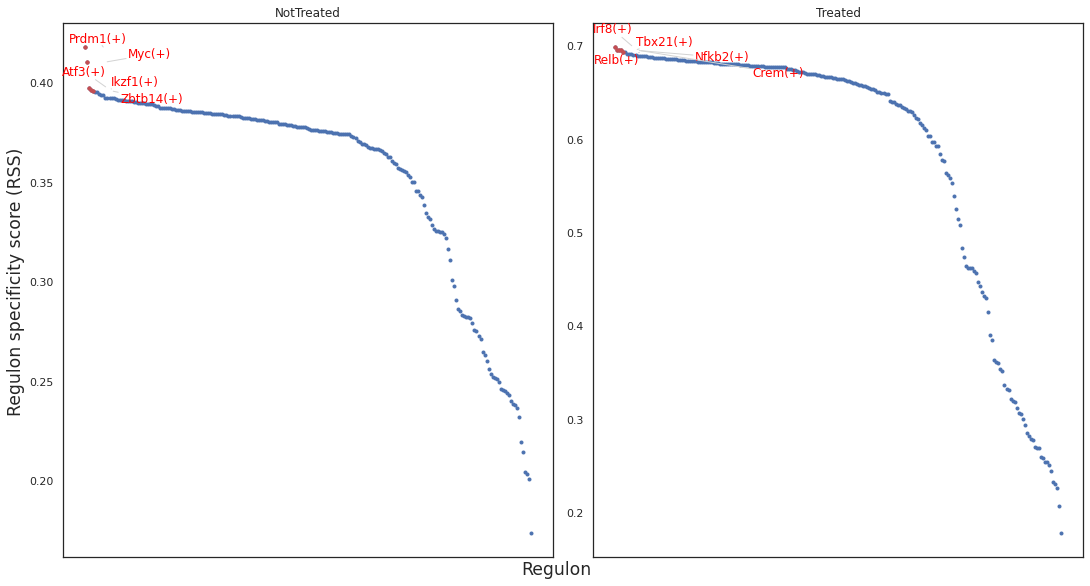

In [57]:
cats = sorted(list(set(adata.obs['Treatment'])))
sns.set_theme(style='white')
fig = plt.figure(figsize=(15, 8))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(1,2,num)
    plot_rss(rss_cellType, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("SmakePlot.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [16]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [17]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)

/home/lugli/spuccio/anaconda3/envs/pyscenic/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [19]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in adata.obs['Treatment'] ]

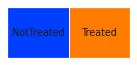

In [22]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)

/home/lugli/spuccio/anaconda3/envs/pyscenic/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 11.552000000000106, '')

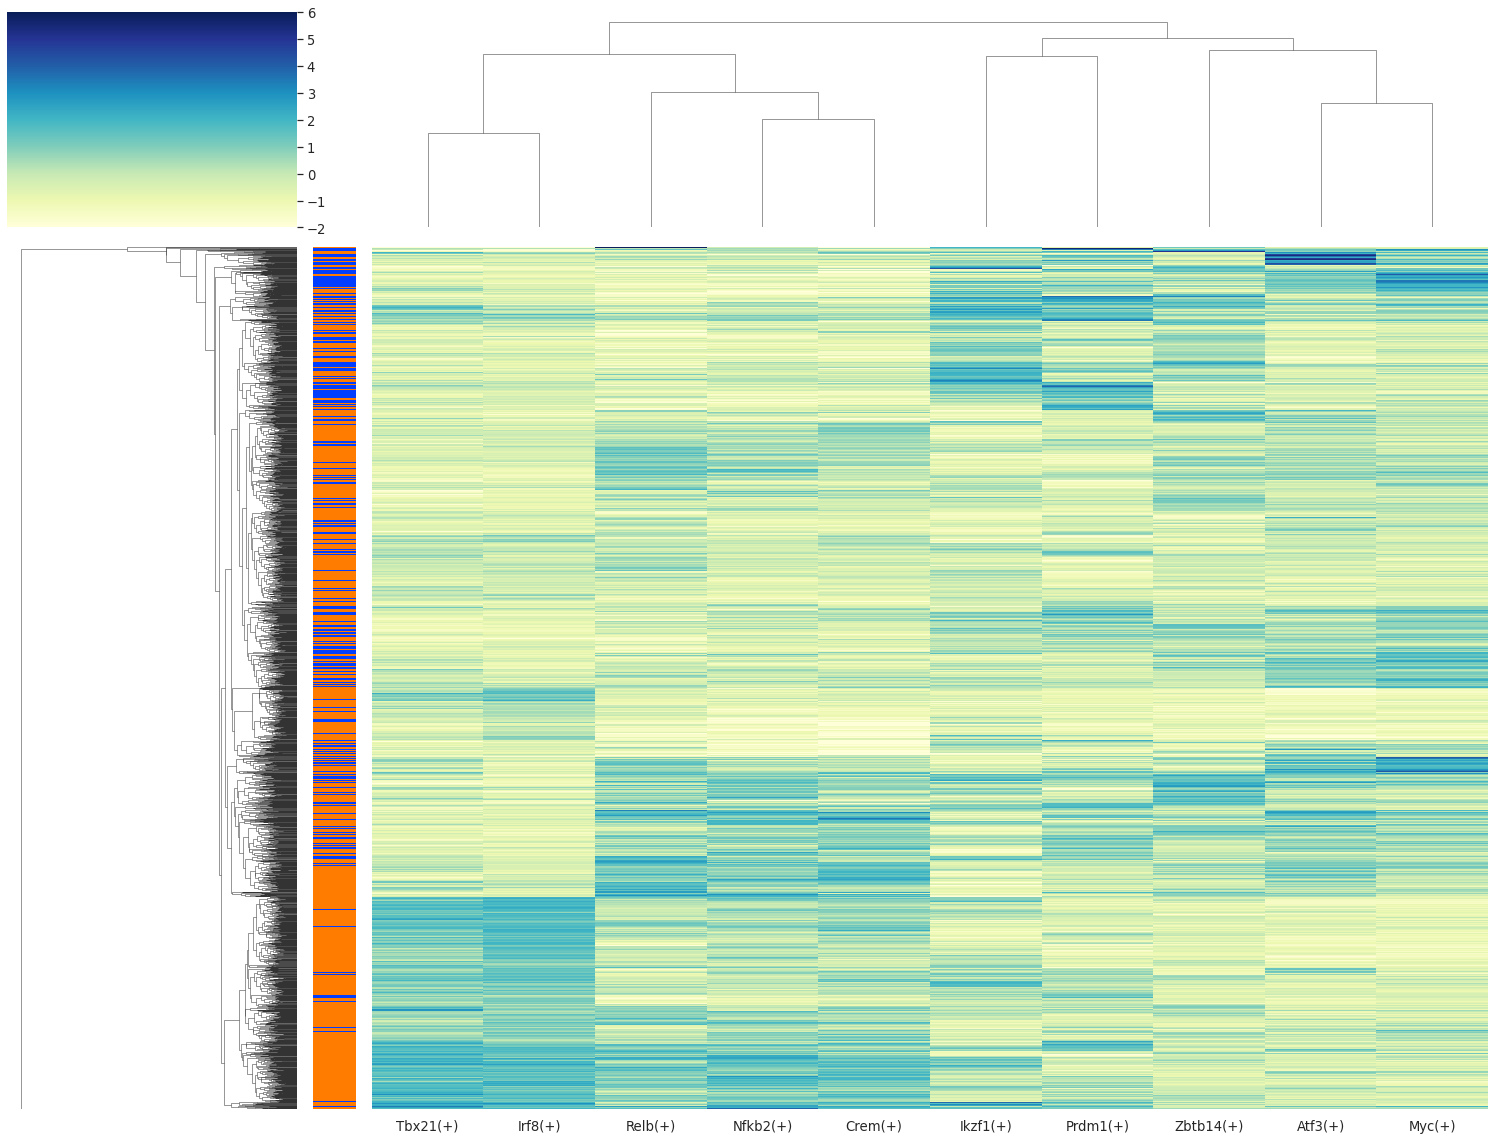

In [23]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')

In [25]:
auc_mtx_Z2 =  auc_mtx_Z 

In [27]:
auc_mtx_Z2 = auc_mtx_Z2.set_index(adata.obs['Treatment'])

In [33]:
auc_mtx_ZMean= auc_mtx_Z2.groupby([auc_mtx_Z2.index]).mean()

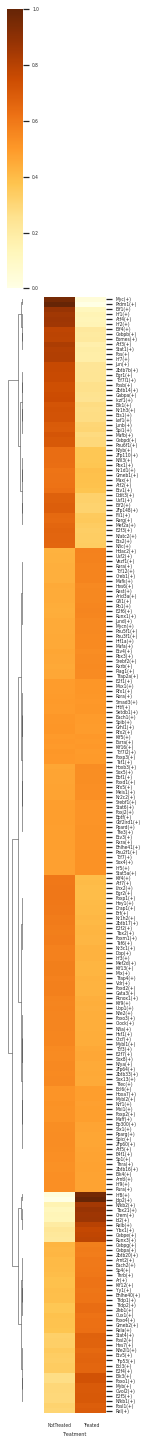

In [53]:
sns.set(font_scale=0.4)
# You can customize the colormap by changing the cmap parameter
g = sns.clustermap(auc_mtx_ZMean.T, cmap='YlOrBr',method='ward',
               standard_scale=1,vmin=0, vmax=1,figsize=(2, 20),cbar=True,
               col_cluster=False,center=0.5)
g.savefig("ActivityHeatmap_Mean_Zscore.pdf",format = 'pdf',dpi=300)

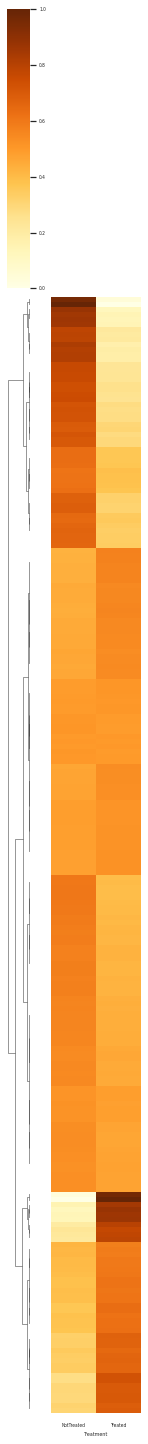

In [55]:
sns.set(font_scale=0.4)
# You can customize the colormap by changing the cmap parameter
g = sns.clustermap(auc_mtx_ZMean.T, cmap='YlOrBr',method='ward',
               standard_scale=1,vmin=0, vmax=1,figsize=(2, 20),cbar=True,yticklabels=False,
               col_cluster=False,center=0.5)
g.savefig("ActivityHeatmap_Mean_Zscore_NO_label.pdf",format = 'pdf',dpi=300)

In [58]:
auc_mtx_ZMean.to_csv("RSS_score_Zscore_transformed_Mean_Treatment.csv",sep="\t",header=True,index=True)